In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.diagnostic as diag
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 

In [ ]:
# Global Variables

In [81]:
# Variable classification
variables = pd.read_csv('./data/variables.txt', encoding = "ISO-8859-1")
quant_con_values = variables.loc[variables['Clasification'] == 'Cuantitativa_continua']

# Analisis Exploratorio

In [51]:
train_data = pd.read_csv('./data/train.csv', encoding = "ISO-8859-1")
display(train_data)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Analizando las variables numericas

In [13]:
quant_col_vars = train_data.describe().columns[1:-1]
display(len(quant_col_vars))

36

In [85]:
train_data[quant_con_values['Variable'].values].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904
std,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000


LotFrontage: Kurtosis: 17.375300497599614 Skewness: 2.160865994705543 

LotArea: Kurtosis: 202.5437927513529 Skewness: 12.195142125084478 

MasVnrArea: Kurtosis: 10.04360232122905 Skewness: 2.6663261001607435 

BsmtFinSF1: Kurtosis: 11.076089857631942 Skewness: 1.6837708962341815 

BsmtFinSF2: Kurtosis: 20.04041549471293 Skewness: 4.250888017057445 

BsmtUnfSF: Kurtosis: 0.4692620789683075 Skewness: 0.9193227015582005 

TotalBsmtSF: Kurtosis: 13.201041630635025 Skewness: 1.522688086978629 

1stFlrSF: Kurtosis: 5.722076026587489 Skewness: 1.3753417421837937 

2ndFlrSF: Kurtosis: -0.5556767272864769 Skewness: 0.8121942731961613 

LowQualFinSF: Kurtosis: 82.945932358931 Skewness: 9.002080417658552 

GrLivArea: Kurtosis: 4.874265760253215 Skewness: 1.365155954773434 

GarageArea: Kurtosis: 0.9098227950882034 Skewness: 0.1797959420587727 

WoodDeckSF: Kurtosis: 2.978604140391349 Skewness: 1.5397916998042025 

OpenPorchSF: Kurtosis: 8.457180405184337 Skewness: 2.361911928568972 

EnclosedPor

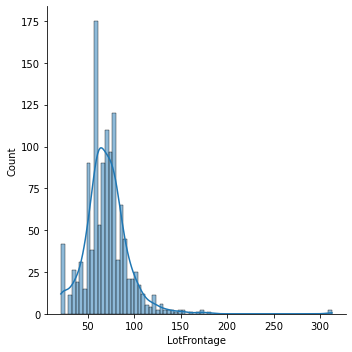

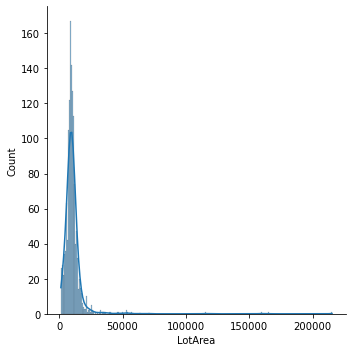

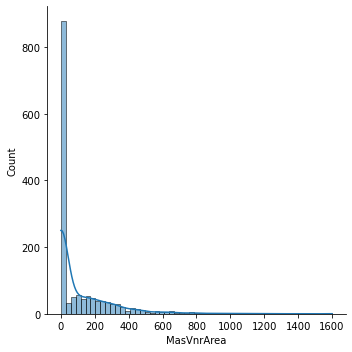

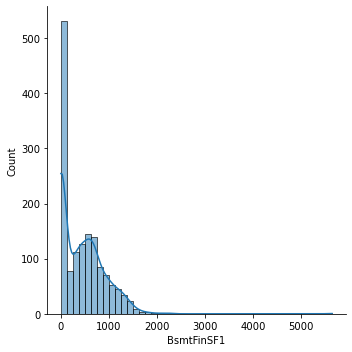

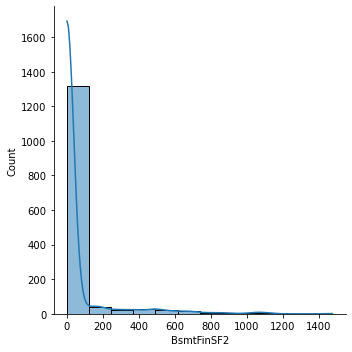

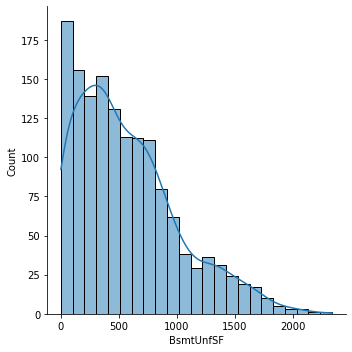

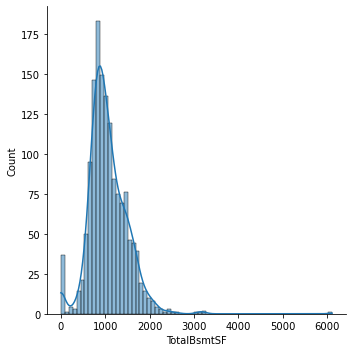

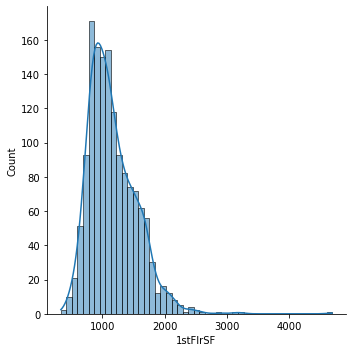

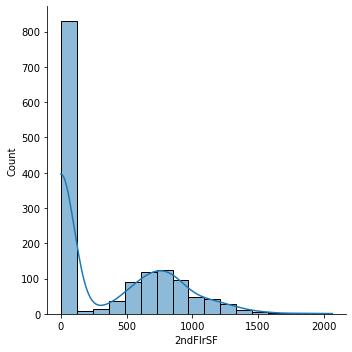

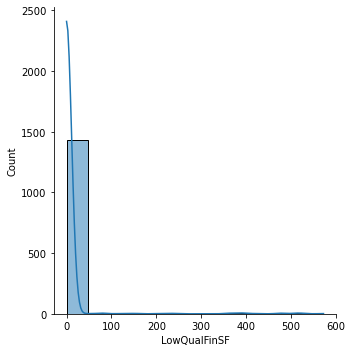

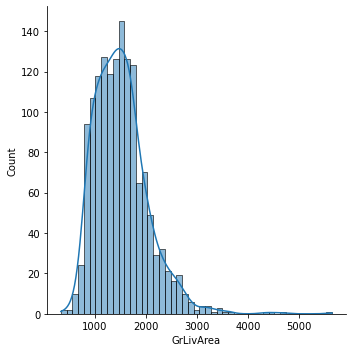

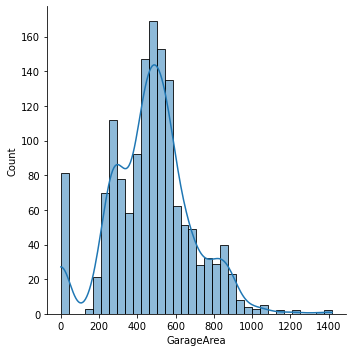

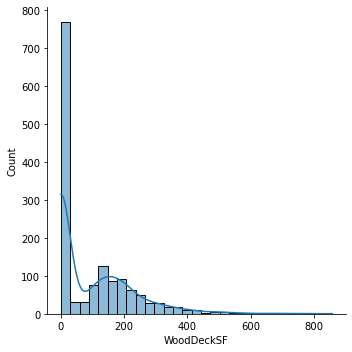

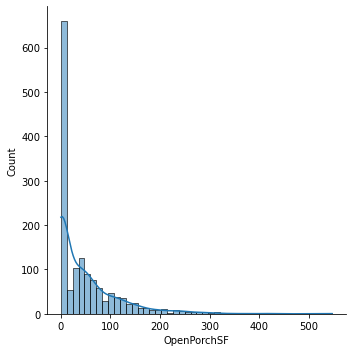

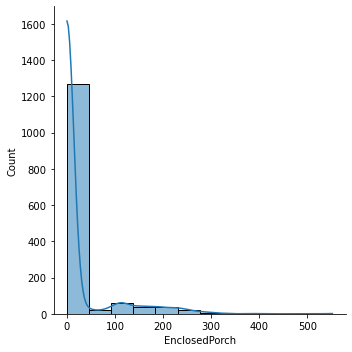

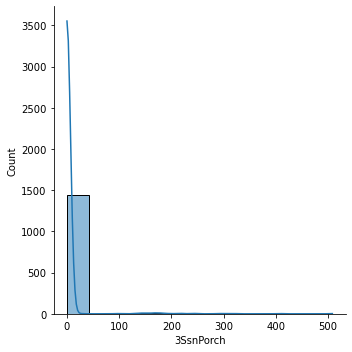

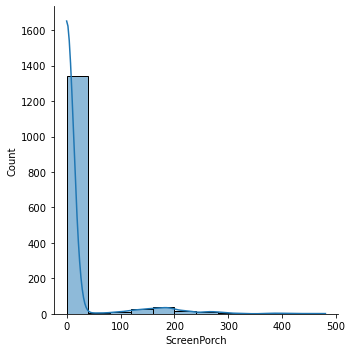

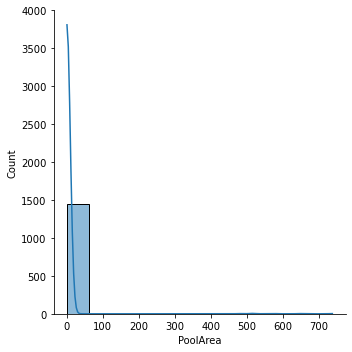

In [86]:
for var in quant_con_values['Variable'].values:
    # Activar para analisis sin valores de 0
#     data = train_data[var].replace(0, np.nan)
#     data = data.dropna(how='all', axis=0)

    data = train_data[var].dropna(how='all', axis=0)
    
    # Gráfico
    sns.displot(data, kde=True)

    # Mostrando normalidad
    print('\033[1m' + var + '\033[0m' + ': Kurtosis:', stats.kurtosis(data), 'Skewness:', stats.skew(data), '\n')

### Analizando las variables categoricas

### Analizando la variable de interes

In [6]:
#skewness and kurtosis
print('Skewness: %f' % train_data['SalePrice'].skew())
print('Kurtosis: %f' % train_data['SalePrice'].kurt())
print('\n---Describe---')
train_data['SalePrice'].describe()

Skewness: 1.882876
Kurtosis: 6.536282

---Describe---


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [38]:
stat,p = stats.shapiro(train_data[["SalePrice"]].dropna())
print('Kolmogorov-Smirnov:\np=%f\n'% p)
ks_statistic, p_value = diag.lilliefors(train_data[["SalePrice"]].dropna())
print('Lilliefors:\nks=%f\np=%f'%(ks_statistic,p_value))

Kolmogorov-Smirnov:
p=0.000000

Lilliefors:
ks=1.000000
p=0.001000


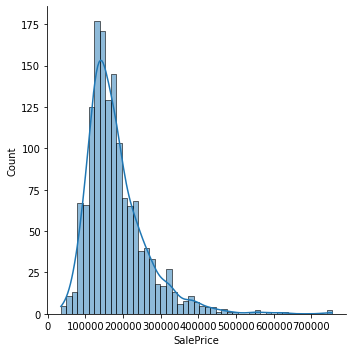

In [21]:
sns.displot(train_data['SalePrice'], kde=True)

<AxesSubplot:xlabel='SalePrice'>

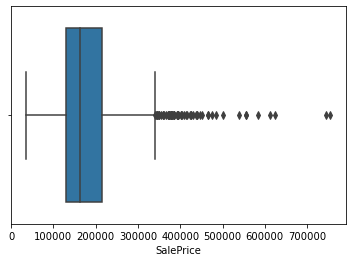

In [28]:
sns.boxplot(x=train_data["SalePrice"])

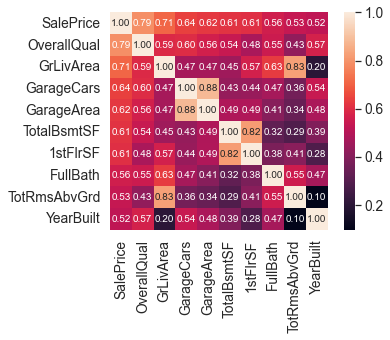

In [22]:
k = 10 #number of variables for heatmap
corrmat = train_data.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

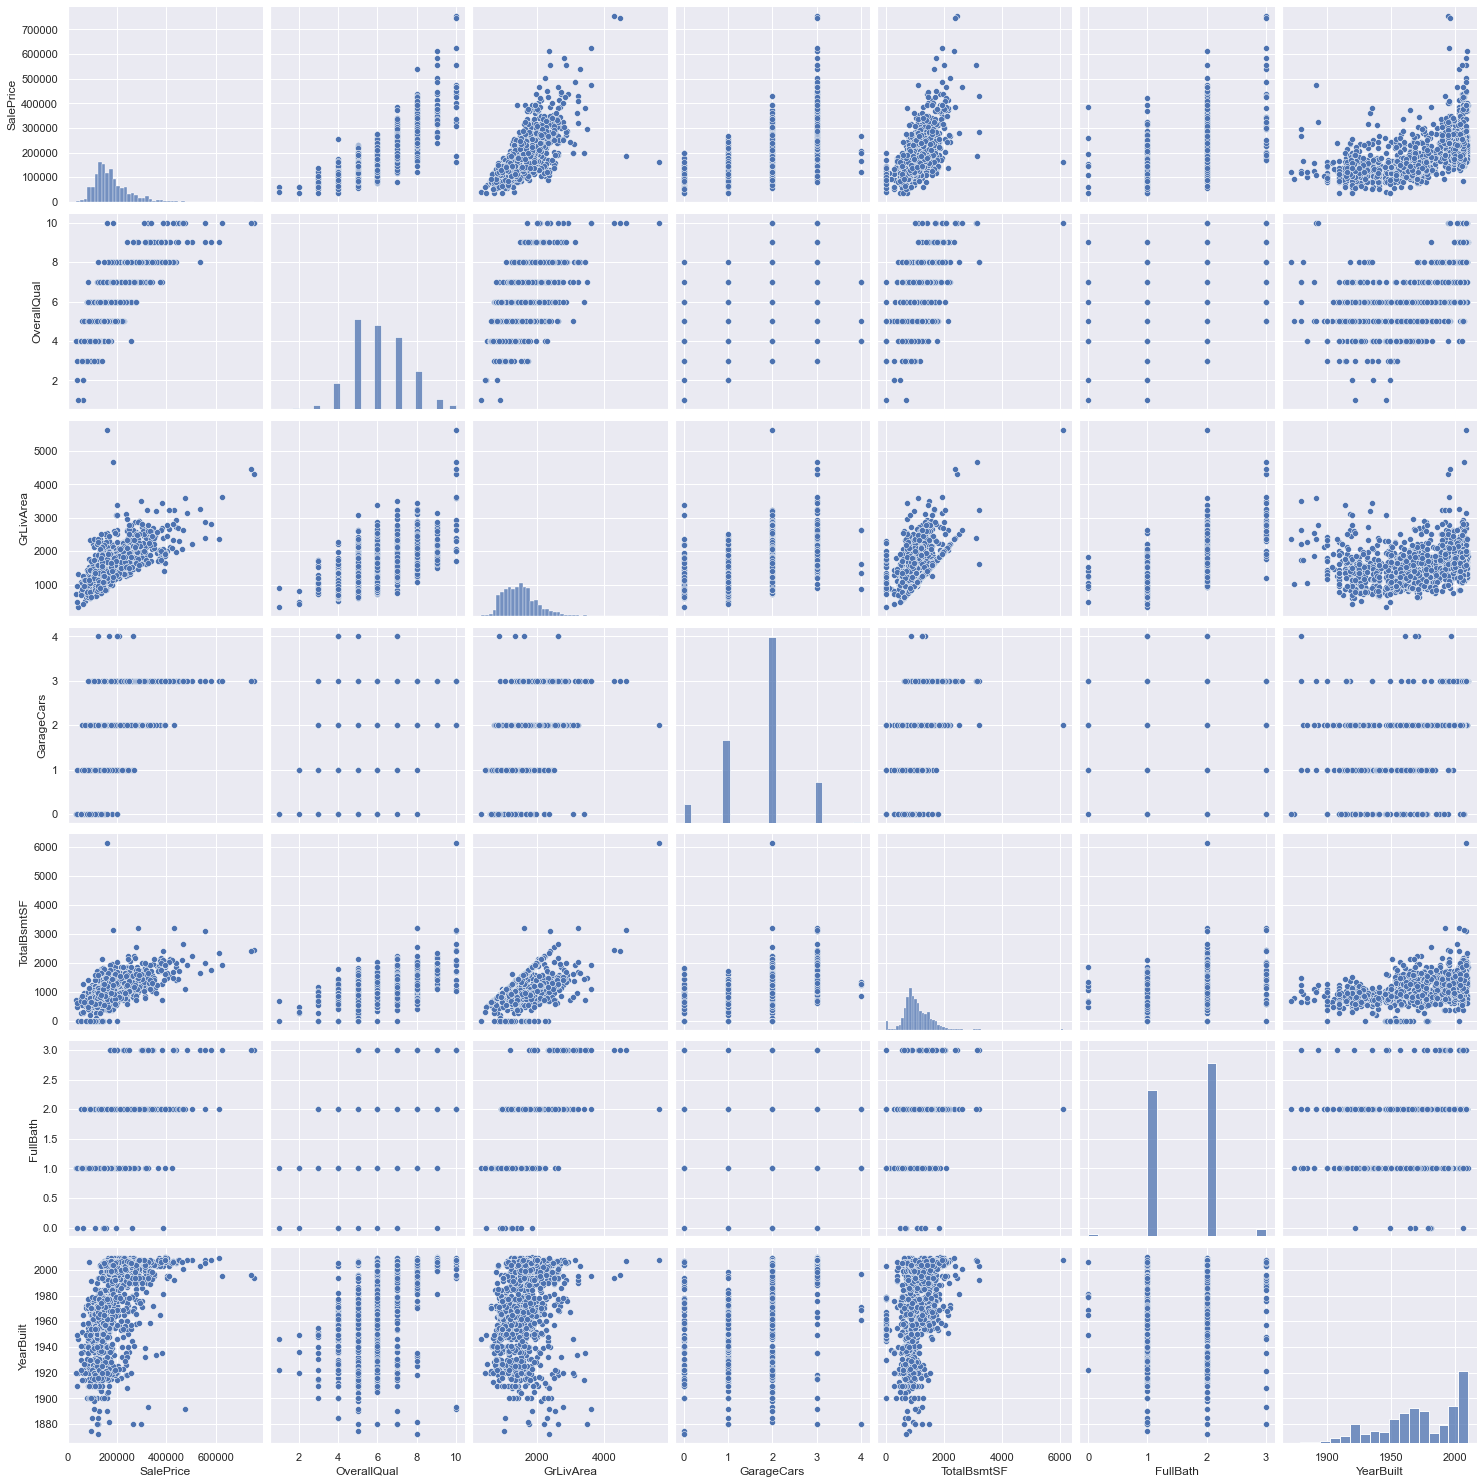

In [26]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_data[cols], height= 3)
plt.show()